# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:
1) One interesting thing I noticed was that there seemed to be a correlation between lattitude and temperature. It looked like as you go away from 0 in lattitude in both directions, the maximum temperature starts to decrease.
2) It looks like there is no real clear correlation between lattitude and humidity, cloudiness or wind speed. I am assuming because those values are way too random and cannot be as consistant as temperature. For example we know that in summer the temperature will be higher but we
   cannot say the same for something like a cloudy day - there is not a clear pattern for that. 
3) It appears that the other clear correlation from the plots is that wind speed increases as you go away from 0 in lattitude in both directions - this is the same as with lattude and temperature.


In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


city_list = []
# lat_list = []
# lng_list = []
# temperature_list = []
# humidity_list = []
# cloud_list = []
# wind_list = []
# country_list = []
# date_list = []
# id_list = []

# loop through the list of units and append them to temperatures list
for city in cities:
    # Build query URL based on current element in units
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
   
    # Get temperature from JSON response
    try:
        temperature = weather_json["main"]["temp_max"]
        lattitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        ids = weather_json["weather"][0]["id"]

        city_list.append({"City": city, "Lat": lattitude, "Lng": longitude, "Max Temp": temperature, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind, "Country": country, "Date": date})

        # city = pd.DataFrame({"City": [city_list], "Lat": [lat_list], "Lng": [lng_list], "Max Temp": [temperature_list], "Humidity": [humidity_list], "Cloudiness": [cloud_list], "Wind Speed": [wind_list], "Country": [country_list], "Date": [date_list]})

        # temperature_list.append(temperature)
        # humidity_list.append(humidity)
        # cloud_list.append(cloudiness)
        # wind_list.append(wind)
        # id_list.append(ids)
        # lat_list.append(lattitude)
        # lng_list.append(longitude)
        # country_list.append(country)
        # date_list.append(date)

        print(f'The weather in ', city, " is being recorded")
    except KeyError:
        continue
    # got continue from this website: https://www.tutorialspoint.com/python/python_continue_statement.htm




The weather in  albany  is being recorded
The weather in  avarua  is being recorded
The weather in  tigil  is being recorded
The weather in  severo-kurilsk  is being recorded
The weather in  butaritari  is being recorded
The weather in  bubaque  is being recorded
The weather in  punta arenas  is being recorded
The weather in  ponta do sol  is being recorded
The weather in  castro  is being recorded
The weather in  tiksi  is being recorded
The weather in  nkhata bay  is being recorded
The weather in  itarema  is being recorded
The weather in  ostrovnoy  is being recorded
The weather in  hasaki  is being recorded
The weather in  hermanus  is being recorded
The weather in  busselton  is being recorded
The weather in  luderitz  is being recorded
The weather in  codrington  is being recorded
The weather in  letterkenny  is being recorded
The weather in  puerto ayora  is being recorded
The weather in  lorengau  is being recorded
The weather in  colares  is being recorded
The weather in  kena

In [4]:
weather_df = pd.DataFrame(city_list)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,64.94,94,100,1.39,US,1662415686
1,avarua,-21.2078,-159.7750,77.05,78,100,17.27,CK,1662415687
2,tigil,57.8000,158.6667,45.23,69,0,4.16,RU,1662415687
3,severo-kurilsk,50.6789,156.1250,54.28,93,96,8.63,RU,1662415688
4,butaritari,3.0707,172.7902,81.52,79,76,16.02,KI,1662415688
...,...,...,...,...,...,...,...,...,...
551,lasa,46.6166,10.7002,59.36,89,8,1.81,IT,1662415939
552,prince rupert,54.3161,-130.3201,59.88,69,15,6.76,CA,1662415813
553,ende,-8.8432,121.6623,75.38,89,66,1.63,ID,1662415940
554,tarakan,3.3000,117.6333,74.37,88,100,4.43,ID,1662415941


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_df.to_csv("city_data.csv")

In [5]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,64.94,94,100,1.39,US,1662415686
1,avarua,-21.2078,-159.7750,77.05,78,100,17.27,CK,1662415687
2,tigil,57.8000,158.6667,45.23,69,0,4.16,RU,1662415687
3,severo-kurilsk,50.6789,156.1250,54.28,93,96,8.63,RU,1662415688
4,butaritari,3.0707,172.7902,81.52,79,76,16.02,KI,1662415688


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
over_humidity = weather_df.loc[weather_df["Humidity"] > 100]
print(over_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:

# Looks like there were no cities with a humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

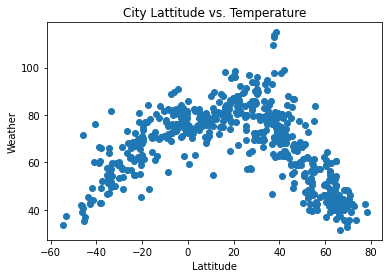

In [21]:
x1_values = weather_df['Lat']
y1_values = weather_df["Max Temp"]

plt.scatter(x1_values,y1_values)
plt.xlabel('Lattitude')
plt.ylabel('Weather')
plt.title('City Lattitude vs. Temperature')
plt.savefig("lattitude_vs_temperature_plot.png")
plt.show()

## Latitude vs. Humidity Plot

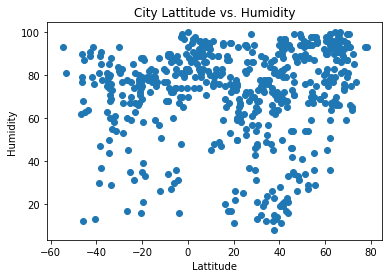

In [22]:
x2_values = weather_df['Lat']
y2_values = weather_df["Humidity"]

plt.scatter(x2_values,y2_values)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title('City Lattitude vs. Humidity')
plt.savefig("lattitude_vs_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

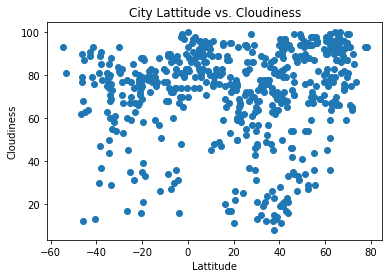

In [23]:
x3_values = weather_df['Lat']
y3_values = weather_df["Cloudiness"]

plt.scatter(x2_values,y2_values)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.title('City Lattitude vs. Cloudiness')
plt.savefig("lattitude_vs_cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

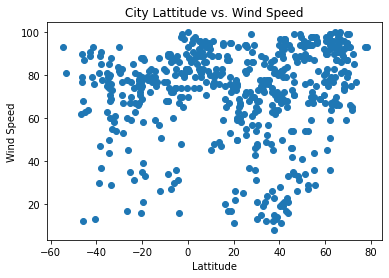

In [24]:
x4_values = weather_df['Lat']
y4_values = weather_df["Wind Speed"]

plt.scatter(x2_values,y2_values)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.title('City Lattitude vs. Wind Speed')
plt.savefig("lattitude_vs_wind_speed_plot.png")
plt.show()

## Linear Regression

In [31]:
# separating hemispheres into north and south
north = weather_df.loc[weather_df["Lat"] >= 0]
north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,64.94,94,100,1.39,US,1662415686
2,tigil,57.8000,158.6667,45.23,69,0,4.16,RU,1662415687
3,severo-kurilsk,50.6789,156.1250,54.28,93,96,8.63,RU,1662415688
4,butaritari,3.0707,172.7902,81.52,79,76,16.02,KI,1662415688
5,bubaque,11.2833,-15.8333,81.12,77,50,9.62,GW,1662415689


In [32]:
south = weather_df.loc[weather_df["Lat"] < 0]
south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,avarua,-21.2078,-159.7750,77.05,78,100,17.27,CK,1662415687
6,punta arenas,-53.1500,-70.9167,37.51,81,40,16.11,CL,1662415689
8,castro,-24.7911,-50.0119,56.57,77,84,4.21,BR,1662415691
10,nkhata bay,-11.6066,34.2907,70.83,51,0,5.39,MW,1662415693
11,itarema,-2.9248,-39.9167,78.55,81,35,17.58,BR,1662415693


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

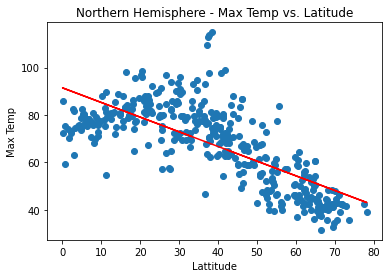

In [36]:
x5_values = north["Lat"]
y5_values = north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x5_values, y5_values)
regress_values = x5_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x5_values,y5_values)

plt.plot(x5_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.savefig("north_hemisphere_max_temp_vs_lattitude_plot.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

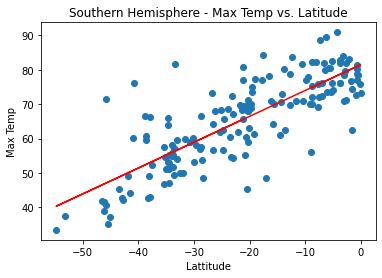

In [44]:
x6_values = south["Lat"]
y6_values = south["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x6_values, y6_values)
regress_values = x6_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x6_values,y6_values)

plt.plot(x6_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.savefig("south_hemisphere_max_temp_vs_lattitude_plot.png")
plt.show()

According to these pair of plots, it looks like the further you go from zero in both directions, the lower the max temperature becomes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

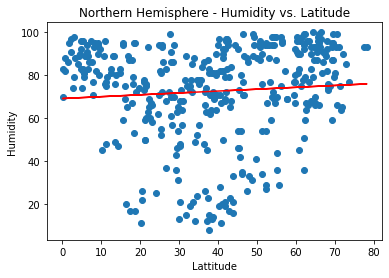

In [39]:
x7_values = north["Lat"]
y7_values = north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x7_values, y7_values)
regress_values = x7_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x7_values,y7_values)

plt.plot(x7_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.savefig("north_hemisphere_humidity_vs_lattitude_plot.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

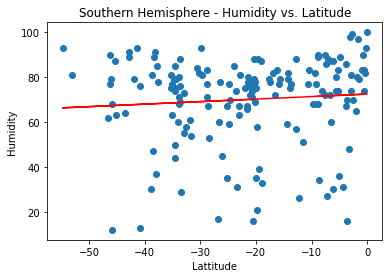

In [40]:
x8_values = south["Lat"]
y8_values = south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x8_values, y8_values)
regress_values = x8_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x8_values,y8_values)

plt.plot(x8_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.savefig("south_hemisphere_humidity_vs_lattitude_plot.png")
plt.show()

It looks like both hemispheres have the same correlation between lattitude and humidity - where there is not a real clear correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

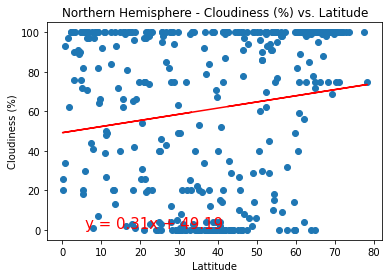

In [49]:
x9_values = north["Lat"]
y9_values = north["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x9_values, y9_values)
regress_values = x9_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x9_values,y9_values)

plt.plot(x9_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig("north_hemisphere_cloudiness_vs_lattitude_plot.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

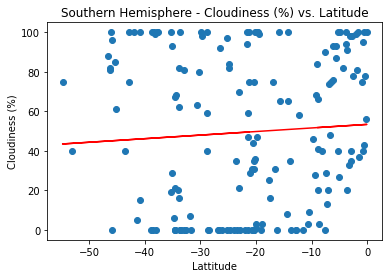

In [50]:
x10_values = south["Lat"]
y10_values = south["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x10_values, y10_values)
regress_values = x10_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x10_values,y10_values)

plt.plot(x10_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig("south_hemisphere_cloudiness_vs_lattitude_plot.png")
plt.show()

Looks like both hemispheres have the same correlation between cloudiness and lattitude but the northern hemisphere has way more cloudiness. I guess this is true since countries like England are known to be cloudy most of the time.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

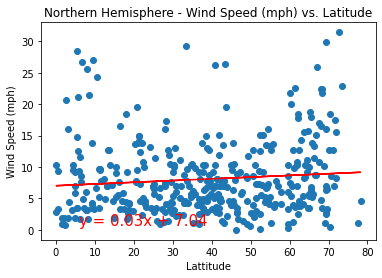

In [52]:
x11_values = north["Lat"]
y11_values = north["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x11_values, y11_values)
regress_values = x11_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x11_values,y11_values)

plt.plot(x11_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig("north_hemisphere_wind_speed_vs_lattitude_plot.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

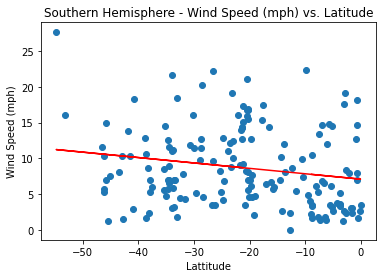

In [53]:
x12_values = south["Lat"]
y12_values = south["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x12_values, y12_values)
regress_values = x12_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x12_values,y12_values)

plt.plot(x12_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig("south_hemisphere_wind_speed_vs_lattitude_plot.png")
plt.show()

It looks like the with both hemispheres, wind speed increases as you move away from zero on the lattitude value.